In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

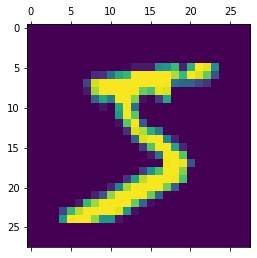

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4758 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3040 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9257


In [13]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2764 - accuracy: 0.9227


[0.2763611972332001, 0.9226999878883362]

In [14]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.7257362e-02, 2.6671603e-07, 3.4756798e-02, 9.6044588e-01,
       2.3912725e-03, 1.5663852e-01, 1.1829928e-06, 9.9978620e-01,
       9.6565247e-02, 6.7874968e-01], dtype=float32)

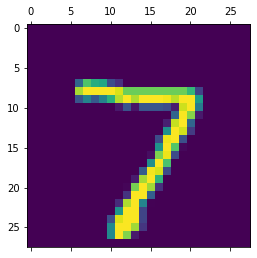

In [15]:
plt.matshow(X_test[0])

In [16]:
np.argmax(y_predicted[0])


7

In [17]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [18]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    0,    2,    0,    5,    3,    2,    2,    0],
       [   0, 1105,    3,    2,    0,    2,    4,    2,   17,    0],
       [   8,    8,  909,   25,   11,    4,   12,   11,   40,    4],
       [   3,    0,   11,  921,    0,   34,    2,   12,   19,    8],
       [   2,    1,    2,    2,  907,    0,   10,    4,    8,   46],
       [  10,    1,    2,   29,    6,  801,   10,    5,   22,    6],
       [  15,    3,    6,    1,    8,   24,  897,    2,    2,    0],
       [   2,    5,   20,    8,    6,    0,    0,  947,    3,   37],
       [  10,    6,    6,   26,    9,   43,    8,   10,  846,   10],
       [  11,    5,    1,   11,   22,    9,    0,   18,    4,  928]])>

Text(69.0, 0.5, 'Truth')

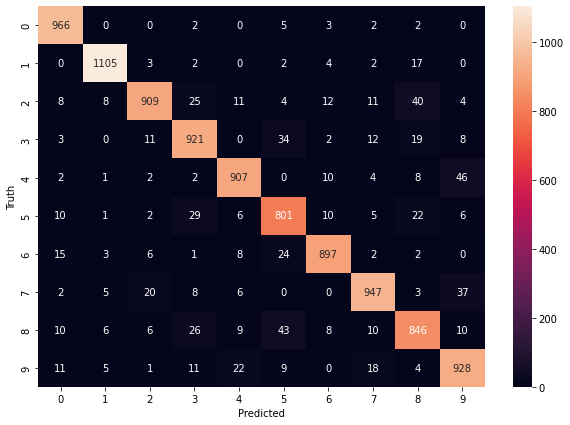

In [19]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Convolutional Neural Network

In [23]:
X_train.shape

(60000, 28, 28)

In [29]:
cnn = keras.Sequential([
    #cnn layer
    keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    
    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    
])

cnn.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1396 - accuracy: 0.9585
Epoch 2/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0460 - accuracy: 0.9852
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0313 - accuracy: 0.9903
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0245 - accuracy: 0.9918
Epoch 5/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0185 - accuracy: 0.9941


In [32]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0342 - accuracy: 0.9902


[0.03417732194066048, 0.9901999831199646]

In [33]:
y_predicted = cnn.predict(X_test)
y_predicted[0]

313/313 [==============================] - 2s 8ms/step


array([1.5239344e-03, 1.7909683e-01, 5.5823004e-01, 7.5073618e-01,
       4.2672674e-03, 5.6777924e-04, 1.2190106e-06, 9.9999994e-01,
       7.3420128e-04, 2.3422478e-01], dtype=float32)

In [34]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [35]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 979,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0, 1132,    1,    0,    0,    0,    2,    0,    0,    0],
       [   3,    1, 1020,    1,    1,    0,    0,    6,    0,    0],
       [   0,    0,    0, 1010,    0,    0,    0,    0,    0,    0],
       [   0,    0,    1,    0,  979,    0,    0,    0,    0,    2],
       [   2,    0,    1,    7,    0,  879,    1,    1,    0,    1],
       [   5,    2,    0,    0,    6,    1,  944,    0,    0,    0],
       [   0,    3,    1,    0,    0,    0,    0, 1023,    0,    1],
       [   8,    0,    4,    2,    2,    1,    1,    2,  951,    3],
       [   0,    3,    0,    0,    8,    4,    0,    6,    3,  985]])>

Text(69.0, 0.5, 'Truth')

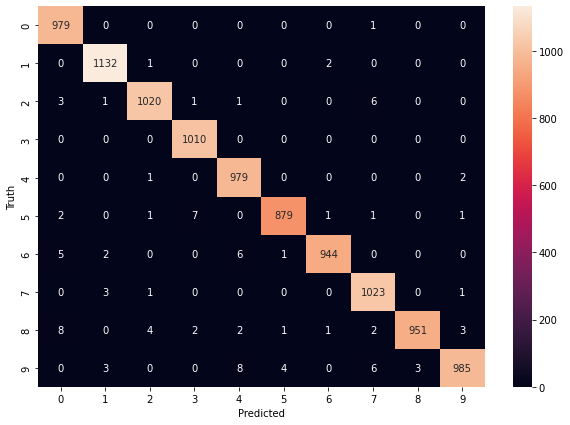

In [36]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')